# Exercise 8: Global minimum of a function

## Answers
From the histogram, we can see that the minimum with the largest basin of attraction is around x = 16. We should expect that x = 16 is also the global minimum of the function. We validate this by calculating the function values at all x_eq values from the histogram.

In [5]:
# Importing useful modules
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Defining a function to calculate its global minimum
def f(x):
    return x**2 - np.cos(4*np.pi*x)


# Defining a function to calculate its global minimum
def g(x):
    return np.cos(x) + np.cos(np.sqrt(2)*x) + np.cos(np.sqrt(3)*x)


# Define parameters for simulated annealing
x0 = 2          # initial value of x
T0 = 1          # initial temperature
alpha = 0.995   # exponential cooling rate
N = int(1e4)    # number of iterations
stepsize = 0.1  # step size for x
x_val = np.arange(0, 50+stepsize, stepsize)


# Define function to generate new candidate x values
def move(x):
    return x + np.random.normal(0, 1)


# Simulated annealing
def simulated_annealing(x0, T0, function, alpha, N, plot=True):
    x = x0
    T = T0
    x_val = [x]
    for i in range(N):
        x_new = move(x)
        delta_E = function(x_new) - function(x)
        if delta_E < 0 or np.random.uniform() < np.exp(-delta_E/T):
            x = x_new
        T *= alpha
        x_val.append(x)

    if plot:
        # Plot x values as a function of time
        plt.plot(x_val, ".")
        plt.title("Simulated annealing for "+ str(function.__name__))
        plt.xlabel("Iteration")
        plt.ylabel("x")
        plt.savefig('Q8_' + str(function.__name__) + '_.jpg')
        plt.show()
        # Print final value of x
        print("Final x value for " + str(function.__name__) + ":", x)

    return x

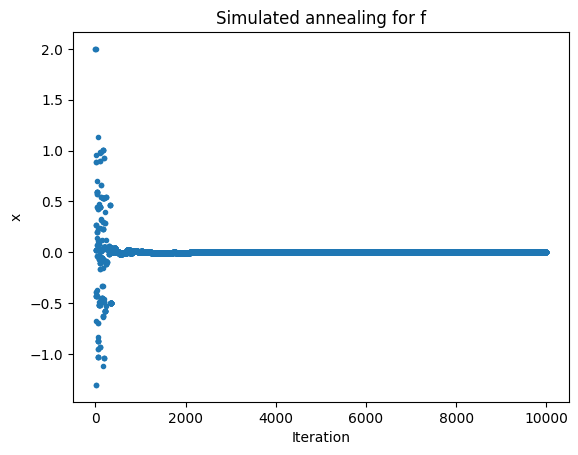

Final x value for f: -0.0001301364552482718


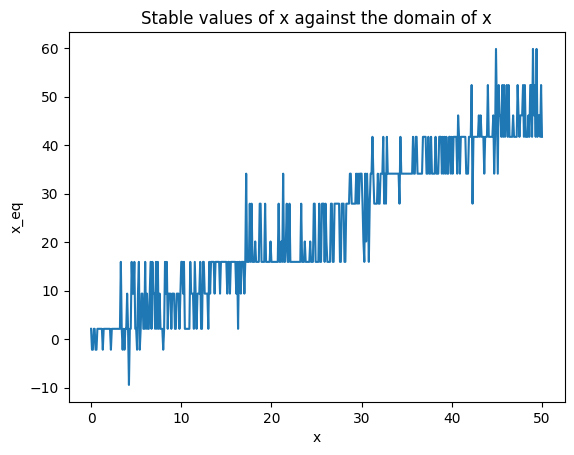

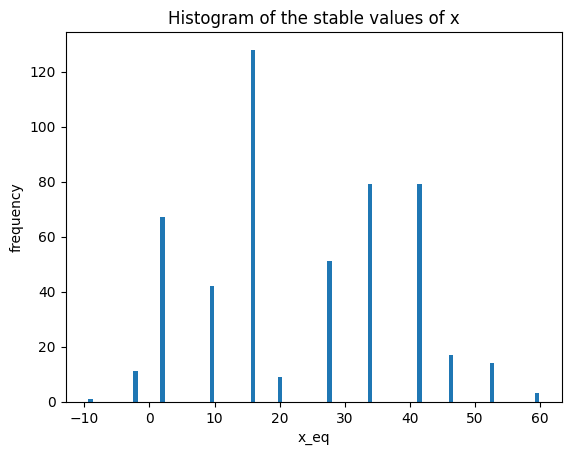

In [7]:
# Run the function of f
simulated_annealing(x0, T0, f, alpha, N)

# Run the function of g
x_eq = np.zeros_like(x_val)
for idx, element in enumerate(x_val):
    x_eq[idx] = simulated_annealing(element, T0, g, alpha, N, plot=False)

# Plot the stable values of x against the domain of x
plt.title('Stable values of x against the domain of x')
plt.xlabel('x')
plt.ylabel('x_eq')
plt.plot(x_val, x_eq)
plt.savefig('Q8_g_x_val.jpg')
plt.show()

# Plot the histogram of the stable values of x
plt.title('Histogram of the stable values of x')
plt.xlabel('x_eq')
plt.ylabel('frequency')
plt.hist(x_eq, bins=100)
plt.savefig('Q8_g_hist.jpg')
plt.show()